In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm
from markov import markov_transition_matrix, markov_likelihood

In [54]:
data = np.array(pd.read_csv('./dummy_data.csv'))

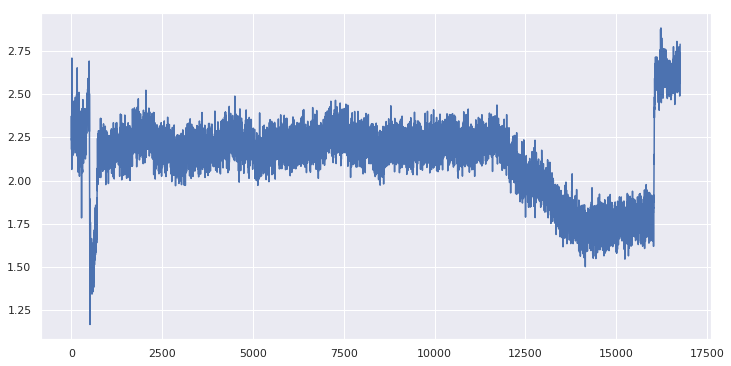

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(data)

#### 6状態手動定義

In [58]:
STATE_CHANGE_POINTS = [
    480,
    780,
    11800,
    14000,
    16050
]

In [59]:
MFCC_STATE_INDICES = [
    np.arange(0, STATE_CHANGE_POINTS[0]),
    np.arange(STATE_CHANGE_POINTS[0], STATE_CHANGE_POINTS[1]),
    np.arange(STATE_CHANGE_POINTS[1], STATE_CHANGE_POINTS[2]),
    np.arange(STATE_CHANGE_POINTS[2], STATE_CHANGE_POINTS[3]),
    np.arange(STATE_CHANGE_POINTS[3], STATE_CHANGE_POINTS[4]),
    np.arange(STATE_CHANGE_POINTS[4], len(data)),
]

Text(0.5, 0, 'Time / arb. unit')

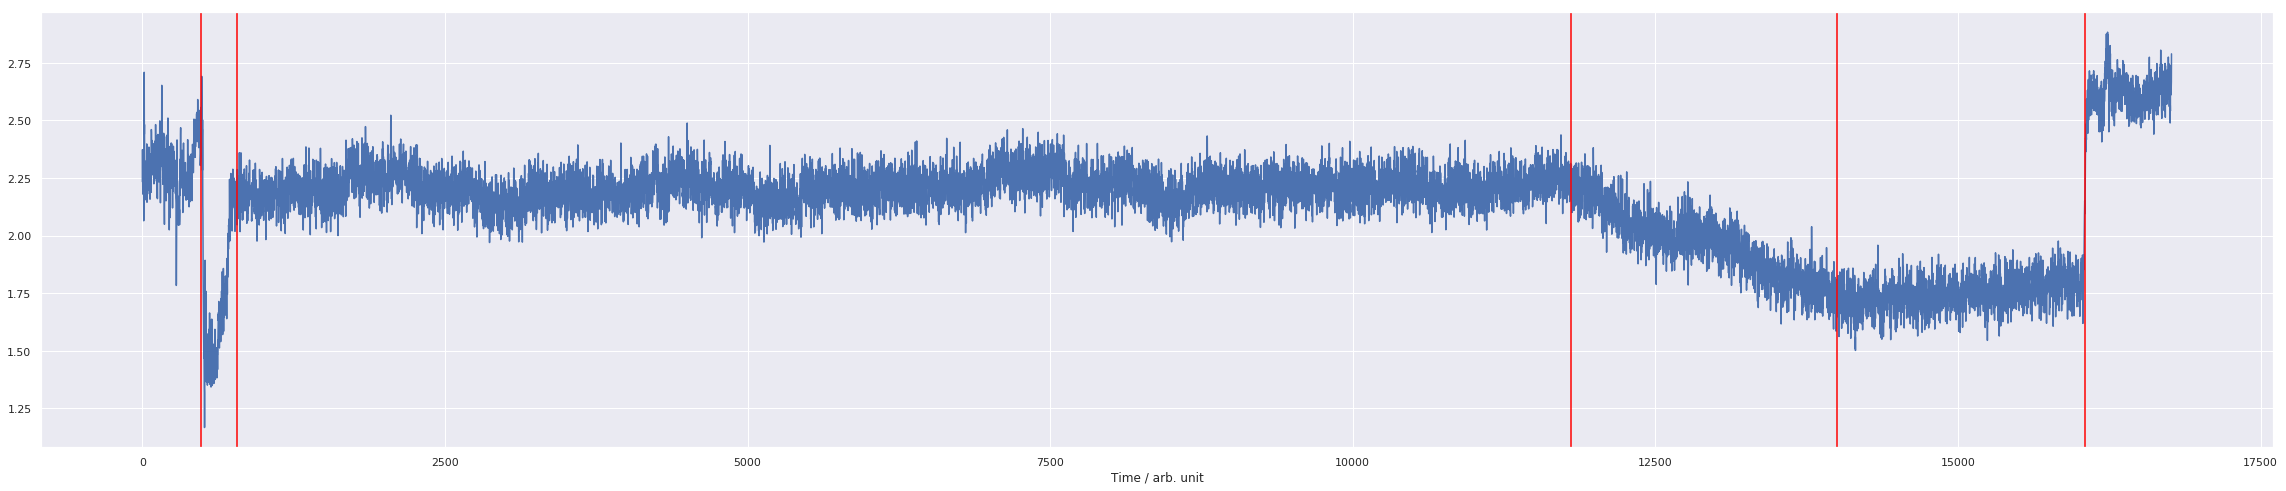

In [60]:
plt.figure(figsize=(40, 8))
plt.plot(data)
for p in STATE_CHANGE_POINTS:
    plt.axvline(p, c='red')

plt.xlabel('Time / arb. unit')

Text(0.5, 0, 'Time / arb. unit')

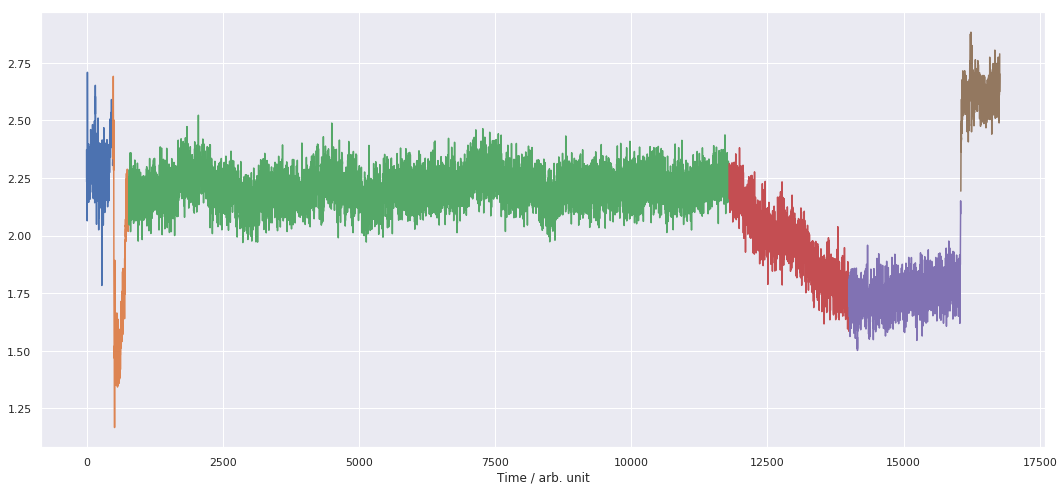

In [61]:
plt.figure(figsize=(18, 8))
for indices in MFCC_STATE_INDICES:
    plt.plot(indices, data[indices])

plt.xlabel('Time / arb. unit')

In [62]:
DIV_NUM = 20
div_points = np.linspace(data.min(), data.max(), DIV_NUM)

#### 6状態毎の遷移確率行列計算

In [63]:
trans_mat_list = []
states_trans_list = []

for indices in tqdm(MFCC_STATE_INDICES):
    trans_mat, states_trans = markov_transition_matrix(
        data[indices],
        div_points
    )
    trans_mat_list.append(trans_mat)
    states_trans_list.append(states_trans)

100%|██████████| 6/6 [00:00<00:00, 235.43it/s]


In [ ]:
for i, tm in enumerate(trans_mat_list):
    print(f'State {i+1}')
    sns.heatmap(tm, annot=True)
    plt.show()

State 1


#### 6状態毎の尤度時系列計算

In [64]:
likelihoods_list = []

seq_len = 50

for trans_mat in tqdm(trans_mat_list):
    likelihoods = []
    for i in range(len(data)//seq_len):
        likelihood, states_trans = markov_likelihood(
            data[i*seq_len:(i+1)*seq_len],
            div_points,
            trans_mat
        )
        likelihoods.append(likelihood/seq_len)
    likelihoods_list.append(likelihoods)

likelihoods_list = np.array(likelihoods_list)

100%|██████████| 6/6 [00:00<00:00, 40.68it/s]


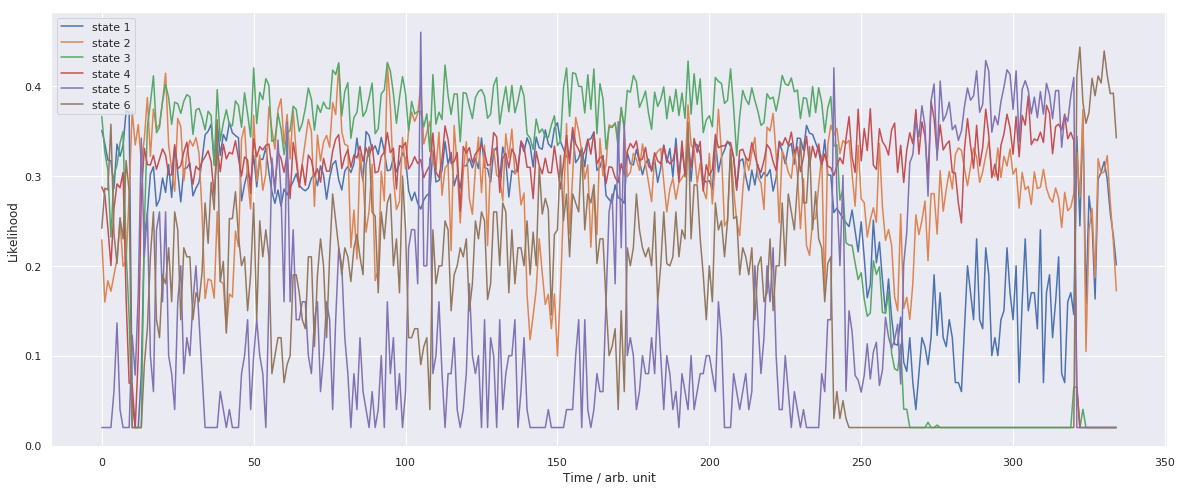

In [65]:
plt.figure(figsize=(20,8))

for i, likelihoods in enumerate(likelihoods_list):
    plt.plot(likelihoods, label=f'state {i+1}')

plt.xlabel('Time / arb. unit')
plt.ylabel('Likelihood')
plt.legend()

#### 尤度最大=各時点の状態

In [66]:
max_prob_state = likelihoods_list.argmax(axis=0)

(-0.2, 5.2)

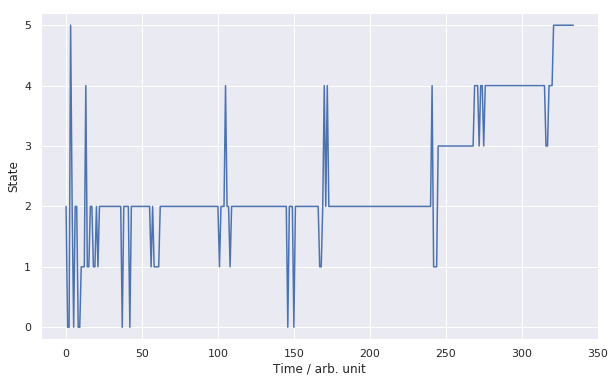

In [72]:
plt.figure(figsize=(10,6))
plt.plot(max_prob_state)
plt.xlabel('Time / arb. unit')
plt.ylabel('State')
plt.ylim(-0.2, 5.2)

(-0.2, 5.2)

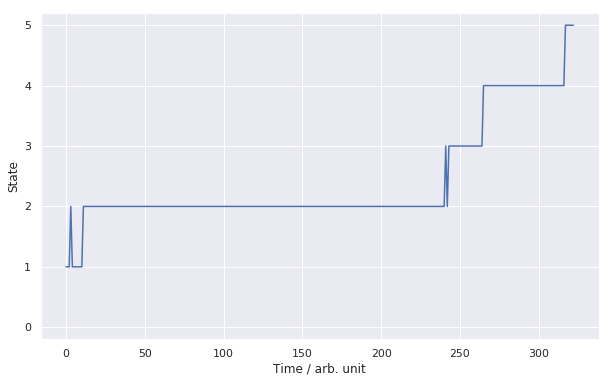

In [84]:
n = 12
weights = np.ones(n)/n
plt.figure(figsize=(10,6))
plt.plot(np.round(np.convolve(max_prob_state, weights, mode='same')[n//2:-n//2]))
plt.xlabel('Time / arb. unit')
plt.ylabel('State')
plt.ylim(-0.2, 5.2)